In [25]:
import numpy as np
import cv2 
import os
from matplotlib import pyplot as plt
import time
%matplotlib inline


In [18]:
%pwd

'C:\\Users\\rithanya\\Documents\\Python\\Industrial_Safety\\coke'

In [4]:
#os.chdir('C:/Users/keerthana.c/Desktop/LOYOLA/') 
img = cv2.imread('cokead/negimg/1.jpg')

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [ ]:
for imgfolder in os.listdir('cokead/'): #iterate thru each of the 5 celeb folders
    for filename in os.listdir('cokead/' + imgfolder):# iterate thru each image in a celeb folder
        filename = 'cokead/' + imgfolder + '/' + filename # build the path to the image file
        print(filename) # print the filename read. For debugging purpose only
        img = cv2.imread(filename,0) # read the image using OpenCV
        plt.imshow(img, cmap = 'gray', interpolation = 'bicubic') # display all images read
        plt.xticks([]), plt.yticks([])
        plt.show()

In [ ]:
for imgfolder in os.listdir('cokead/'):
    for filename in os.listdir('cokead/' + imgfolder):
        filename = 'cokead/' + imgfolder + '/' + filename
        img = cv2.imread(filename,0)
        print(img.shape)

In [ ]:
for imgfolder in os.listdir('cokead/'):
    for filename in os.listdir('cokead/' + imgfolder):
        filename = 'cokead/' + imgfolder + '/' + filename        #print(filename)
        img = cv2.imread(filename,0)
        img = cv2.resize(img, (225,225), interpolation = cv2.INTER_AREA)
        #print(type(img))
        print(img.shape)

In [66]:
# haarcascades_path = os.listdir('C:/Users/keerthana.c/Miniconda3/Library/etc/haarcascades/')
# frontface_alt_cascade = 'C:/Users/keerthana.c/Miniconda3/Library/etc/haarcascades/haarcascade_frontalface_alt.xml'
# frontface_default_cascade = 'C:/Users/keerthana.c/Miniconda3/Library/etc/haarcascades/haarcascade_frontalface_default.xml'
# frontface_alt2_cascade = 'C:/Users/keerthana.c/Miniconda3/Library/etc/haarcascades/haarcascade_frontalface_alt2.xml'
# frontface_alt_tree_cascade = 'C:/Users/keerthana.c/Miniconda3/Library/etc/haarcascades/haarcascade_frontalface_alt2.xml'

# cokelogo_cascade = "C:/Users/rithanya/Documents/Python/Industrial_Safety/coke/cascade/cokelogo50.xml"
haarcascade_fullbody = "C:/Users/rithanya/Miniconda3/Library/etc/haarcascades/haarcascade_fullbody.xml"
#cokelogo_cascade = "C:/Users/rithanya/Documents/Python/Industrial_Safety/coke/cascade2/cokelogo20fromneg.xml"

In [67]:
# faceCascade_default = cv2.CascadeClassifier(frontface_default_cascade)
# faceCascade_alt = cv2.CascadeClassifier(frontface_alt_cascade)
# faceCascade_alt2 = cv2.CascadeClassifier(frontface_alt2_cascade)
# faceCascade_alt_tree = cv2.CascadeClassifier(frontface_alt_tree_cascade)

#cokecascade = cv2.CascadeClassifier(cokelogo_cascade)
fullbodycascade = cv2.CascadeClassifier(haarcascade_fullbody)

In [68]:
#utility function to apply different cascade function on the images at difference scaleFactor
def detect(faceCascade, gray_,  scaleFactor_ = 1.1):
    faces = faceCascade.detectMultiScale(gray_,
                    scaleFactor= scaleFactor_,
                    minNeighbors=5,
                    minSize=(30, 30),
                    flags = cv2.CASCADE_SCALE_IMAGE
                )
    return faces

In [ ]:
import time
i = 0
t1 = time.time()
for imgfolder in os.listdir('cokead/'): #iterate thru each of the 5 celeb folders
    if(imgfolder != '.DS_Store'):
        for filename in os.listdir('cokead/' + imgfolder):# iterate thru each image in a celeb folder
            filename = 'cokead/' + imgfolder + '/' + filename # build the path to the image file
            if(filename.endswith('.jpg')):
                #print(filename) # print the filename read. For debugging purpose only
                img = cv2.imread(filename) # read the image using OpenCV
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                cokelogos = detect(fullbodycascade, gray, 1.1)
#                 if (len(faces)!=1):
#                     faces = detect(faceCascade_default, gray, 1.2)
#                     if(len(faces) != 1):
#                         faces = detect(faceCascade_alt2,gray, 1.1)
#                         if(len(faces) != 1):
#                             faces = detect(faceCascade_alt2,gray, 1.2)
#                             if(len(faces) != 1):
#                                 faces = detect(faceCascade_alt, gray, 1.1)
#                                 if(len(faces) != 1):
#                                     faces = detect(faceCascade_alt, gray, 1.2)
#                                     if(len(faces) != 1):
#                                         faces = detect(faceCascade_alt_tree, gray, 1.1)
#                                         if(len(faces) != 1):
#                                             faces = detect(faceCascade_alt_tree, gray, 1.2)
#                                             if(len(faces) != 1):
#                                                 i = i + 1
#                                                 #continue
                for (x, y, w, h) in cokelogos:
                    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
                plt.imshow(img, cmap = 'gray', interpolation = 'bicubic') # display all images read
                print(filename) # print the filename read. For debugging purpose only
                plt.xticks([]), plt.yticks([])
                plt.show()
                                                

t2 = time.time()
print ('Time taken %f seconds' %  round((t2 - t1),2))
print(i)

In [19]:
from sklearn.feature_extraction.image import PatchExtractor
from skimage import data, transform

def extract_patches(img, N, scale=1.0, patch_size=(100,100)):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

In [20]:
pwd

'C:\\Users\\rithanya\\Documents\\Python\\Industrial_Safety\\coke'

In [28]:
images = []
rootfolder = 'NegFromAds'
for imgfolder in os.listdir(rootfolder): #iterate thru each of the 5 celeb folders
    if(imgfolder == 'pepsi advertisements'):
        for filename in os.listdir(rootfolder + '/' + imgfolder):# iterate thru each image in a celeb folder
            filename = rootfolder + '/' + imgfolder + '/' + filename # build the path to the image file
            if(filename.endswith('.jpg')):
#                 print(filename)
                img = cv2.imread(filename)
                if(img != None):
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    images.append(img)
len(images)
negative_patches = np.vstack([extract_patches(im, 75, scale)
                             for im in images for scale in [1.0]])
negative_patches.shape

C:\Users\rithanya\Miniconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  # Remove the CWD from sys.path while we load stuff.


(6525, 100, 100)

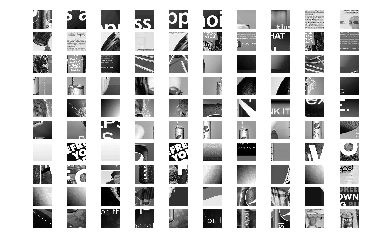

In [29]:
fig, ax = plt.subplots(10, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[10 * i], cmap='gray')
    axi.axis('off')

In [41]:
for i in range(1,len(negative_patches) +1):
    cv2.imwrite('NegFromAds/Patches/' + str(i) + '.jpg', negative_patches[i-1])

In [ ]:
root = 'Source/logo_square'
for filename in os.listdir(root):
    filename = root + '/' + filename        #print(filename)
    img = cv2.imread(filename,0)
    img = cv2.resize(img, (20,20), interpolation = cv2.INTER_AREA)
    #print(type(img))
    print(img.shape)
    cv2.imwrite(filename, img)

In [43]:
def create_bgtxt(imgfolder = 'NegFromAds/Patches'):
    for img in os.listdir(imgfolder):
        line = imgfolder + "/" + img + "\n"
        with open('bg.txt','a') as f:
            f.write(line)

create_bgtxt()